# 55 Cancri e

This doesn't work well


In [1]:
import lightkurve as lk
from glob import glob
import ombre as om
import numpy as np
import matplotlib.pyplot as plt
import lightkurve as lk

import astropy.units as u

In [2]:
name = '55-CNC'

In [3]:
fnames = np.hstack([glob(f'/Volumes/Nibelheim/hst/data/{name}/*.fits'), glob(f'/Volumes/Nibelheim/hst/data/{name}-eclipse/*.fits')])

In [4]:
# Not sure if i'm using all the data here need to check!
#fnames = np.hstack([fnames, glob(f'/Volumes/Nibelheim/hst/data/{name}-eclipse/*.fits')])
fnames = np.sort(fnames)
obs = om.Observation.from_files(fnames, planet_letter='e')

/Users/ch/HST/projects/ombre/src/ombre/visit.py:208: RuntimeWarning: divide by zero encountered in true_divide
  w[self.err / self.sci > 0.1] = 1e10


In [5]:
obs

55-CANCRI [12 Visits]

In [6]:
clc = lk.search_lightcurve('55 Cancri', author='SPOC').download().remove_nans().flatten(501)
clc.flux = clc.flux.value * u.electron/u.s
clc.flux_err = clc.flux_err.value * u.electron/u.s

<AxesSubplot:xlabel='Phase [JD]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

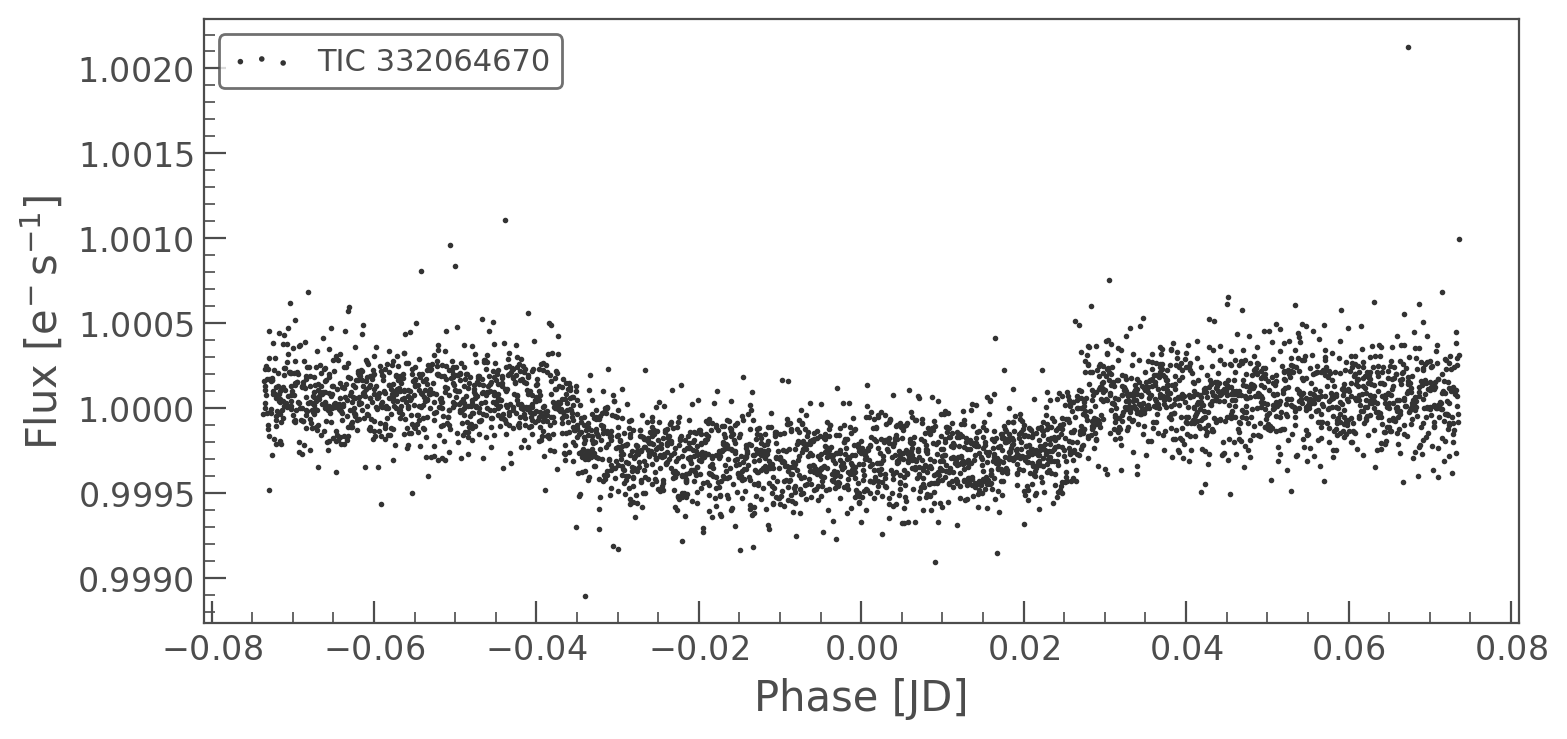

In [7]:
k = np.abs(((clc.time.value - (obs.t0 - 2457000 + obs.period/2))/obs.period) % 1 - 0.5) < 0.1
clc[k].fold(obs.period, obs.t0 - 2457000).scatter()

<AxesSubplot:xlabel='Phase [JD]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

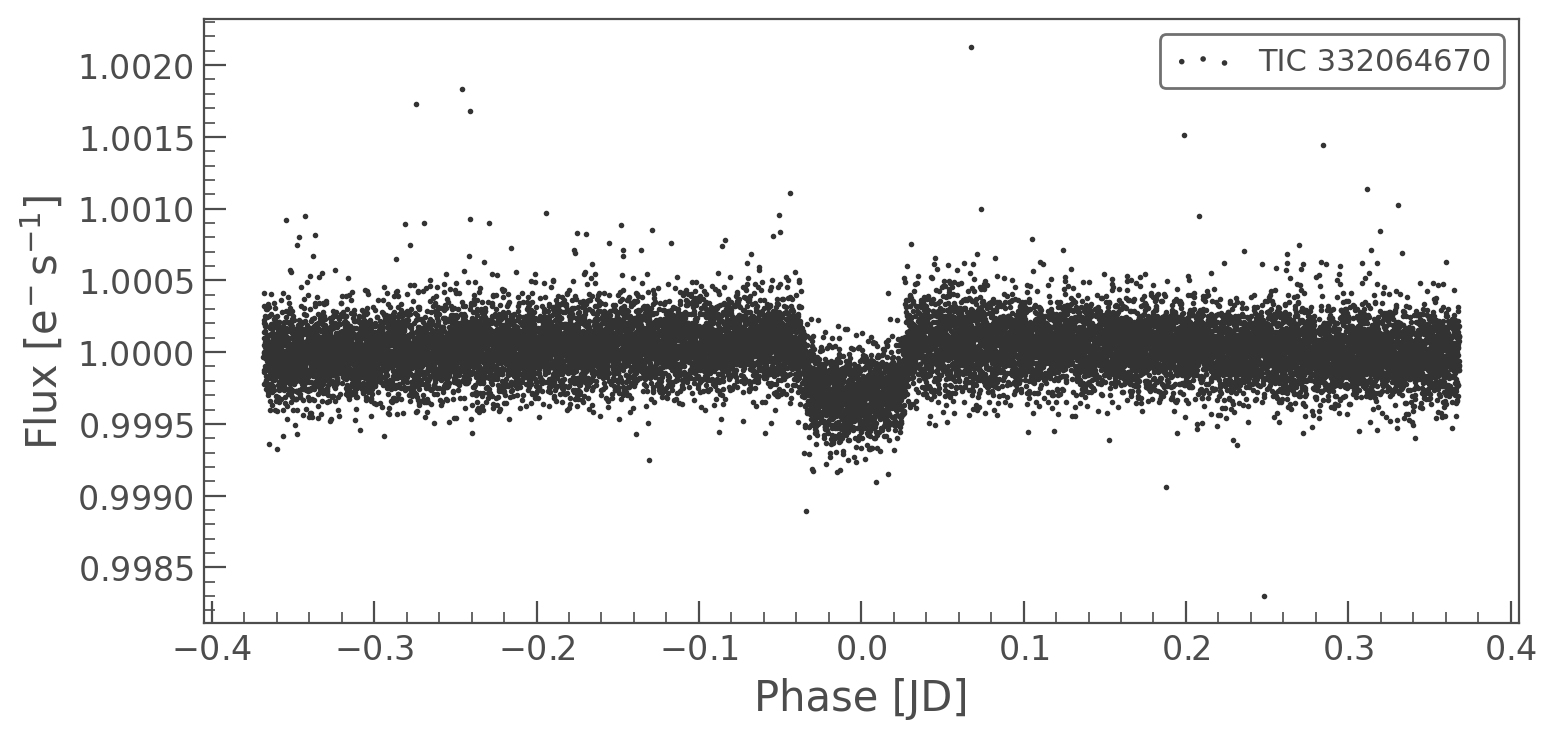

In [8]:
clc.fold(obs.period, obs.t0 - 2457000).scatter()

In [9]:
obs.fit_transit(x_suppl=clc.time.value[k] + 2457000,
                y_suppl=clc.flux.value[k],
                yerr_suppl=clc.flux_err.value[k],
                exptime_suppl=np.median(np.diff(clc.time.value)), fit_t0=True, fit_period=True, fit_inc=True)

<AxesSubplot:xlabel='Phase', ylabel='$e^-s^{-1}$'>

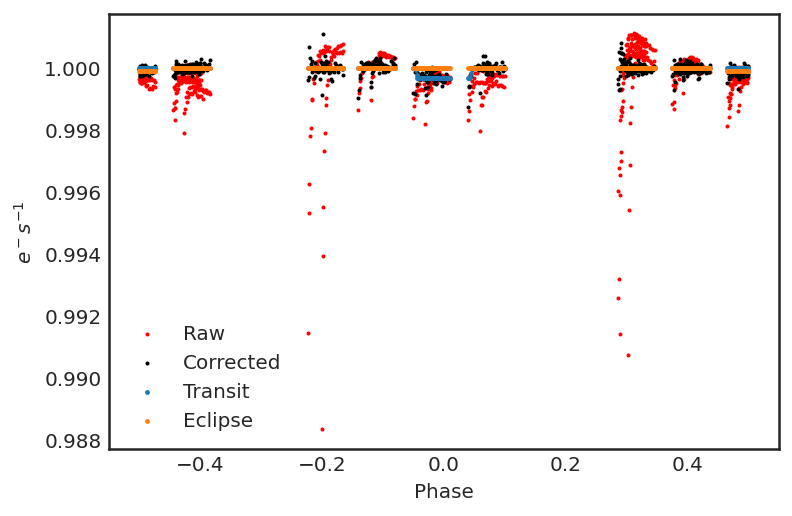

In [10]:
obs.plot()

In [11]:
obs.fit_model()

Fitting Transit/Eclipse Model:   0%|          | 0/12 [00:00<?, ?it/s]

Fitting Transit/Eclipse Model:   8%|▊         | 1/12 [00:56<10:26, 56.97s/it]

Fitting Transit/Eclipse Model:  17%|█▋        | 2/12 [01:50<09:09, 55.00s/it]

Fitting Transit/Eclipse Model:  25%|██▌       | 3/12 [02:44<08:11, 54.61s/it]

Fitting Transit/Eclipse Model:  33%|███▎      | 4/12 [03:38<07:14, 54.34s/it]

Fitting Transit/Eclipse Model:  42%|████▏     | 5/12 [04:35<06:27, 55.34s/it]

Fitting Transit/Eclipse Model:  50%|█████     | 6/12 [05:33<05:36, 56.07s/it]

Fitting Transit/Eclipse Model:  58%|█████▊    | 7/12 [06:23<04:31, 54.25s/it]

Fitting Transit/Eclipse Model:  67%|██████▋   | 8/12 [07:15<03:33, 53.43s/it]

Fitting Transit/Eclipse Model:  75%|███████▌  | 9/12 [08:09<02:41, 53.78s/it]

Fitting Transit/Eclipse Model:  83%|████████▎ | 10/12 [09:05<01:48, 54.40s/it]

Fitting Transit/Eclipse Model:  92%|█████████▏| 11/12 [10:01<00:54, 54.79s/it]

Fitting Transit/Eclipse Model: 100%|██████████| 12/12 [10:59<00:00, 55.92s/it]

Fitting Transit/Eclipse Model: 100%|██████████| 12/12 [10:59<00:00, 55.00s/it]

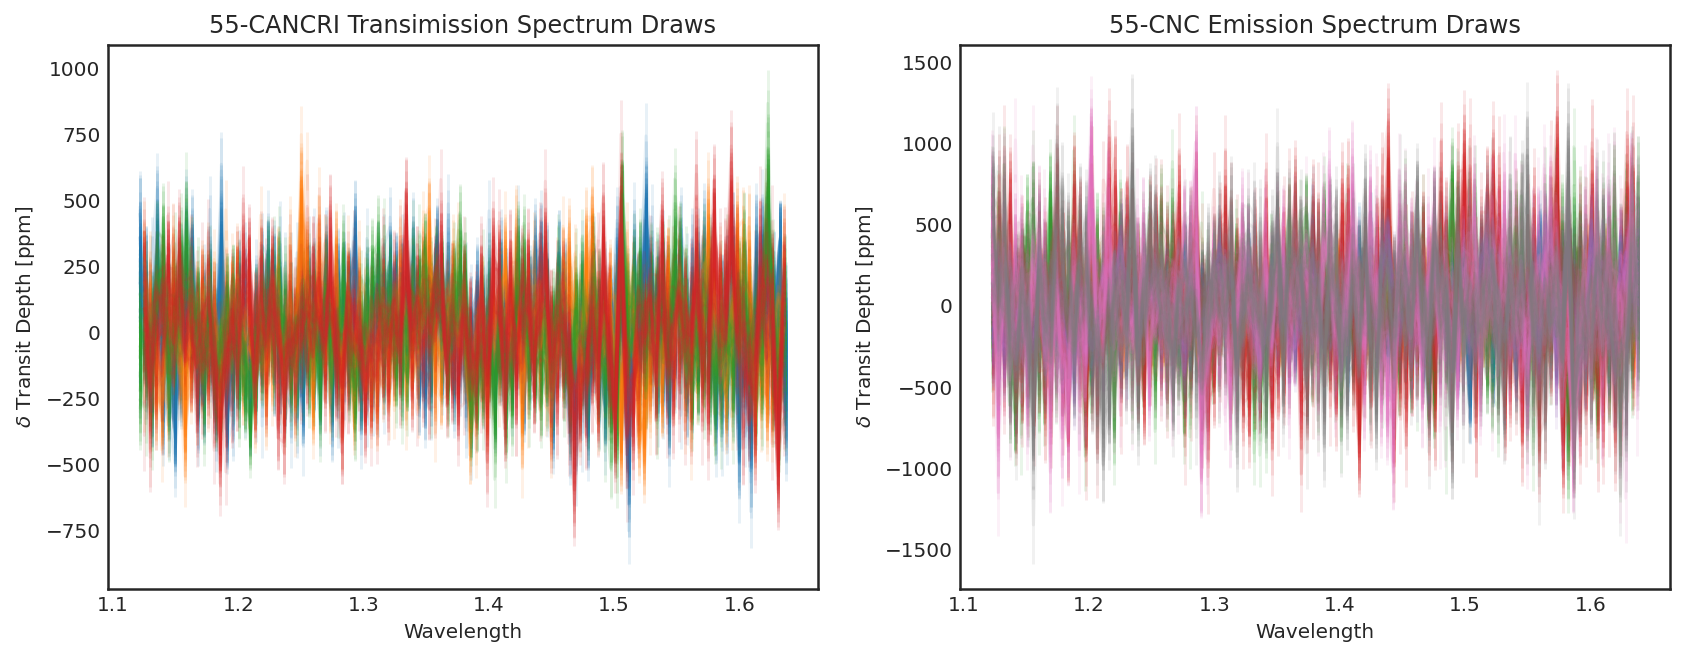

In [12]:
obs.plot_spectra()

<AxesSubplot:title={'center':'55-CANCRI Transmission Spectrum, Visit: 1'}, xlabel='Wavelength', ylabel='$\\delta$ Transit Depth [ppm]'>

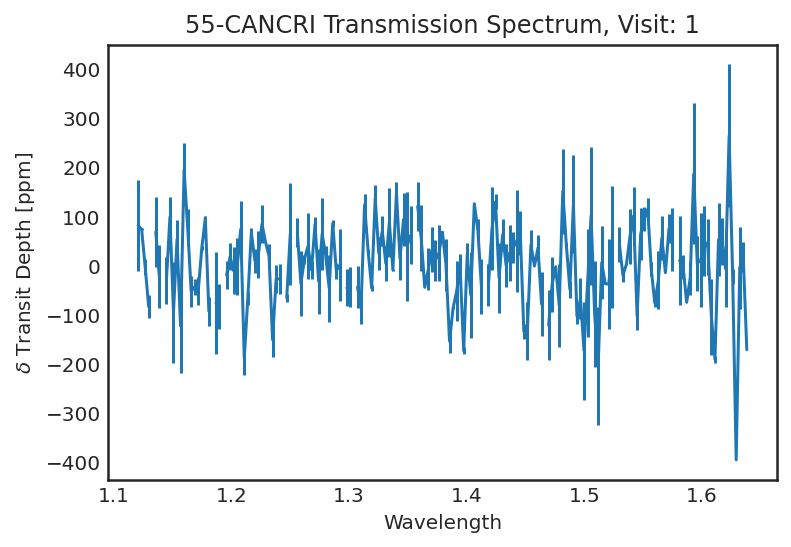

In [13]:
om.Spectra([visit.transmission_spectrum for visit in obs if visit.transmission_spectrum.spec.sum() != 0 ]).flatten().bin(bins=np.linspace(0.8, 1.7, 300)).plot()

<AxesSubplot:title={'center':'55-CNC Emission Spectrum, Visit: 3'}, xlabel='Wavelength', ylabel='$\\delta$ Transit Depth [ppm]'>

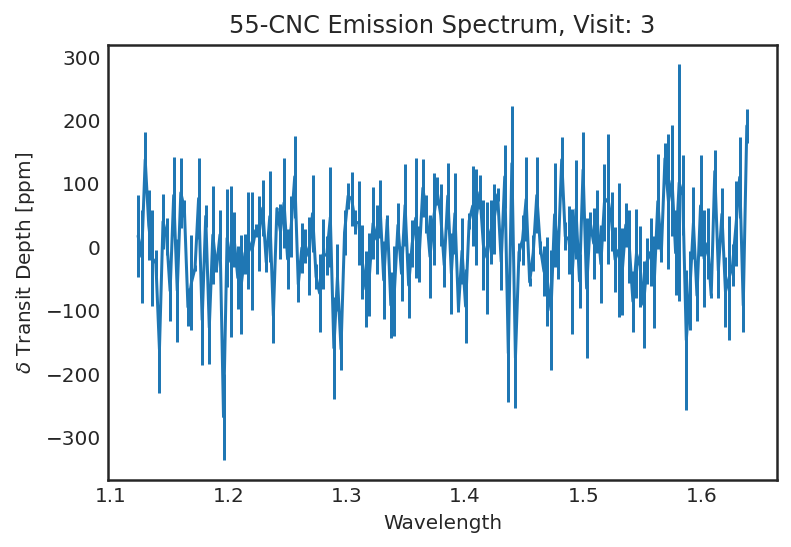

In [14]:
om.Spectra([visit.emission_spectrum for visit in obs if visit.emission_spectrum.spec.sum() != 0 ]).flatten().bin(bins=np.linspace(0.8, 1.7, 300)).plot()

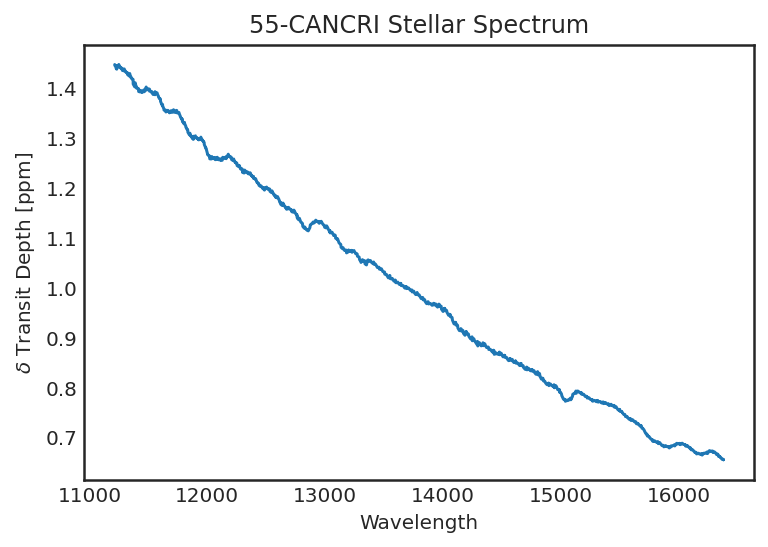

In [15]:
spec = obs.stellar_spectra
spec.plot()
spec.hdulist.writeto(f'results/{name}_stellar_spectrum.fits', overwrite=True)

In [16]:
from astropy.io import fits
try:
    hdulist = om.Spectra([visit.transmission_spectrum for visit in obs if visit.transmission_spectrum.spec.sum() != 0]).hdulist
    hdulist.writeto(f'results/{name}_transmission.fits', overwrite=True)
except:
    pass
try:    
    hdulist = om.Spectra([visit.emission_spectrum for visit in obs if visit.emission_spectrum.spec.sum() != 0]).hdulist
    hdulist.writeto(f'results/{name}_emission.fits', overwrite=True)
except:
    pass

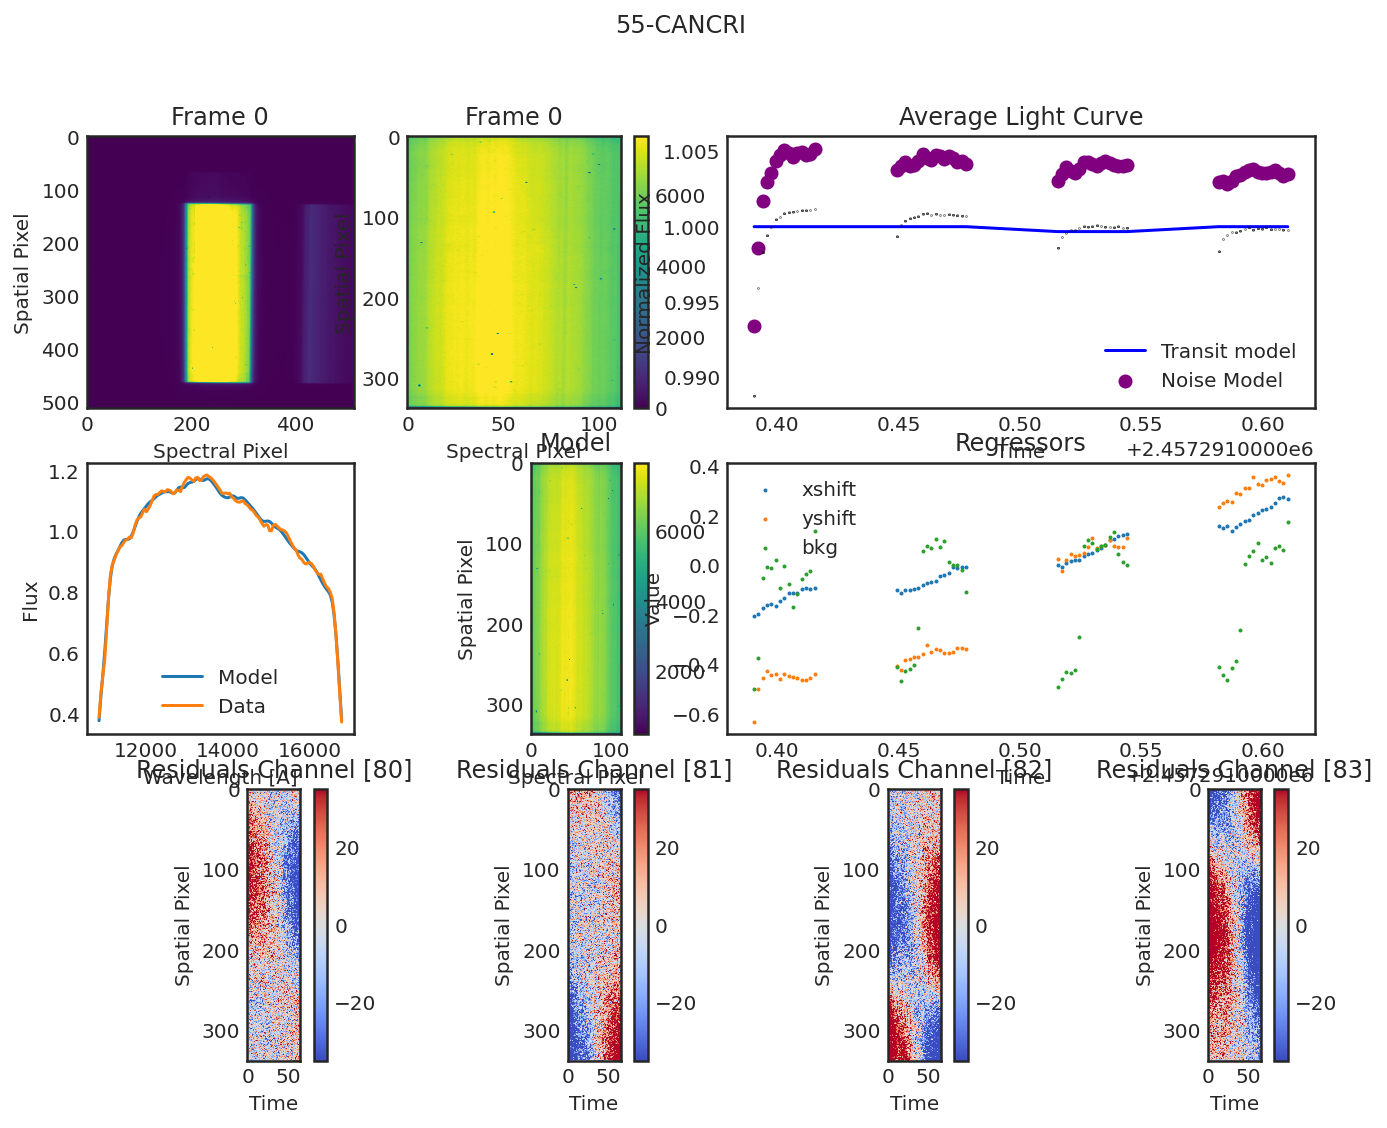

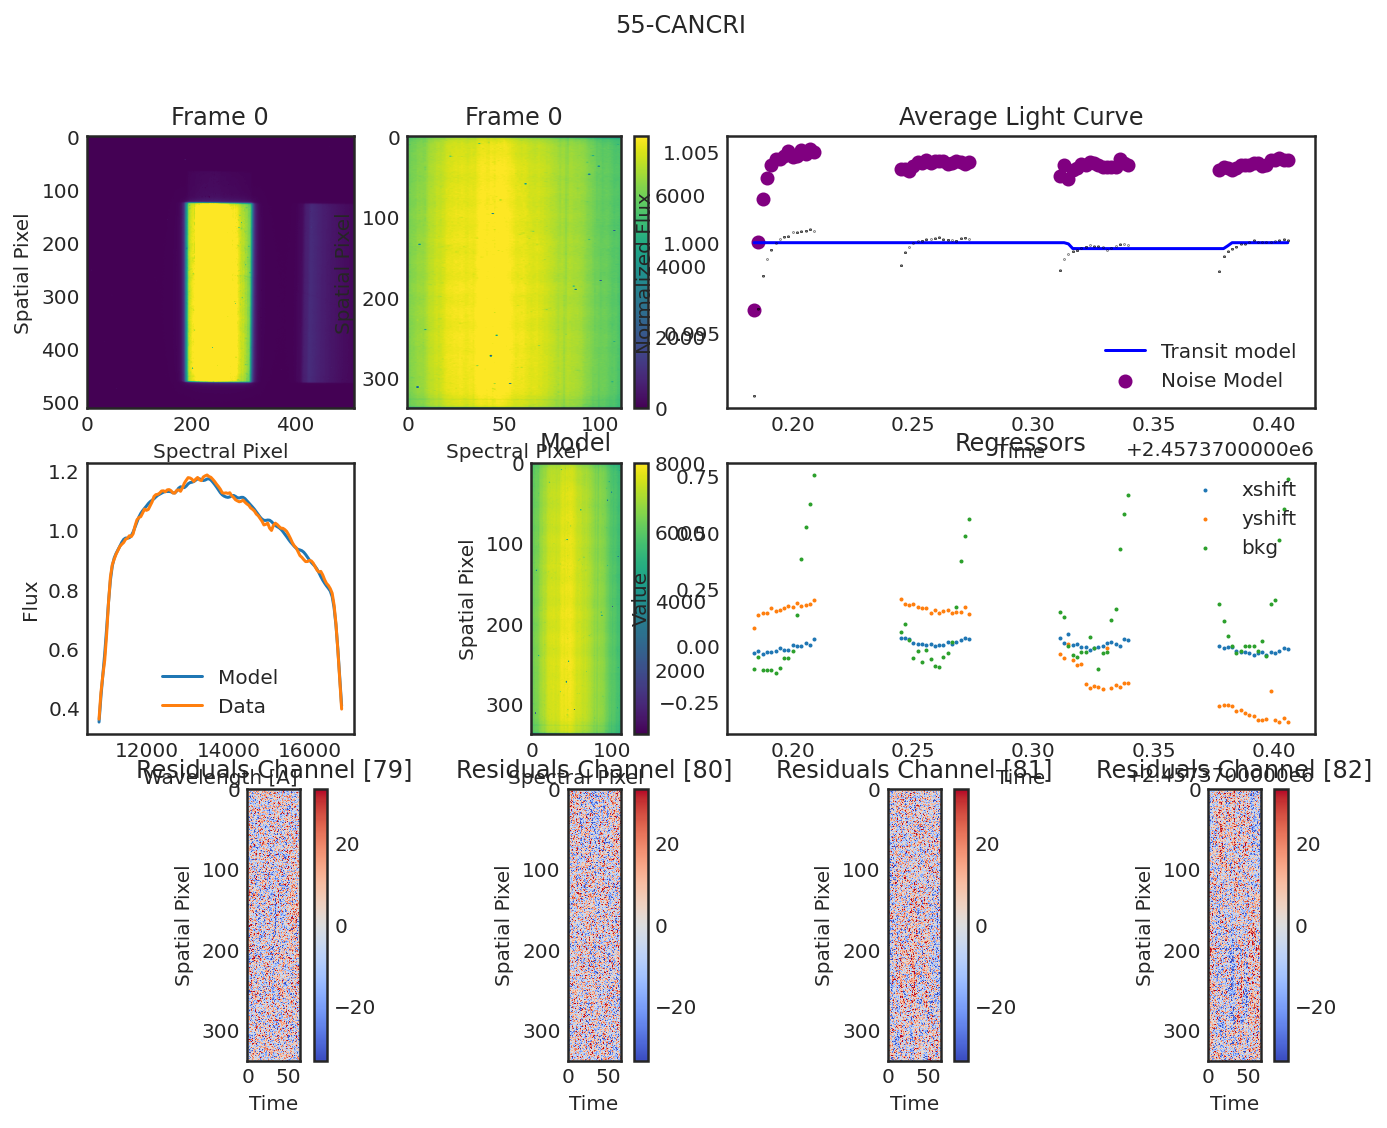

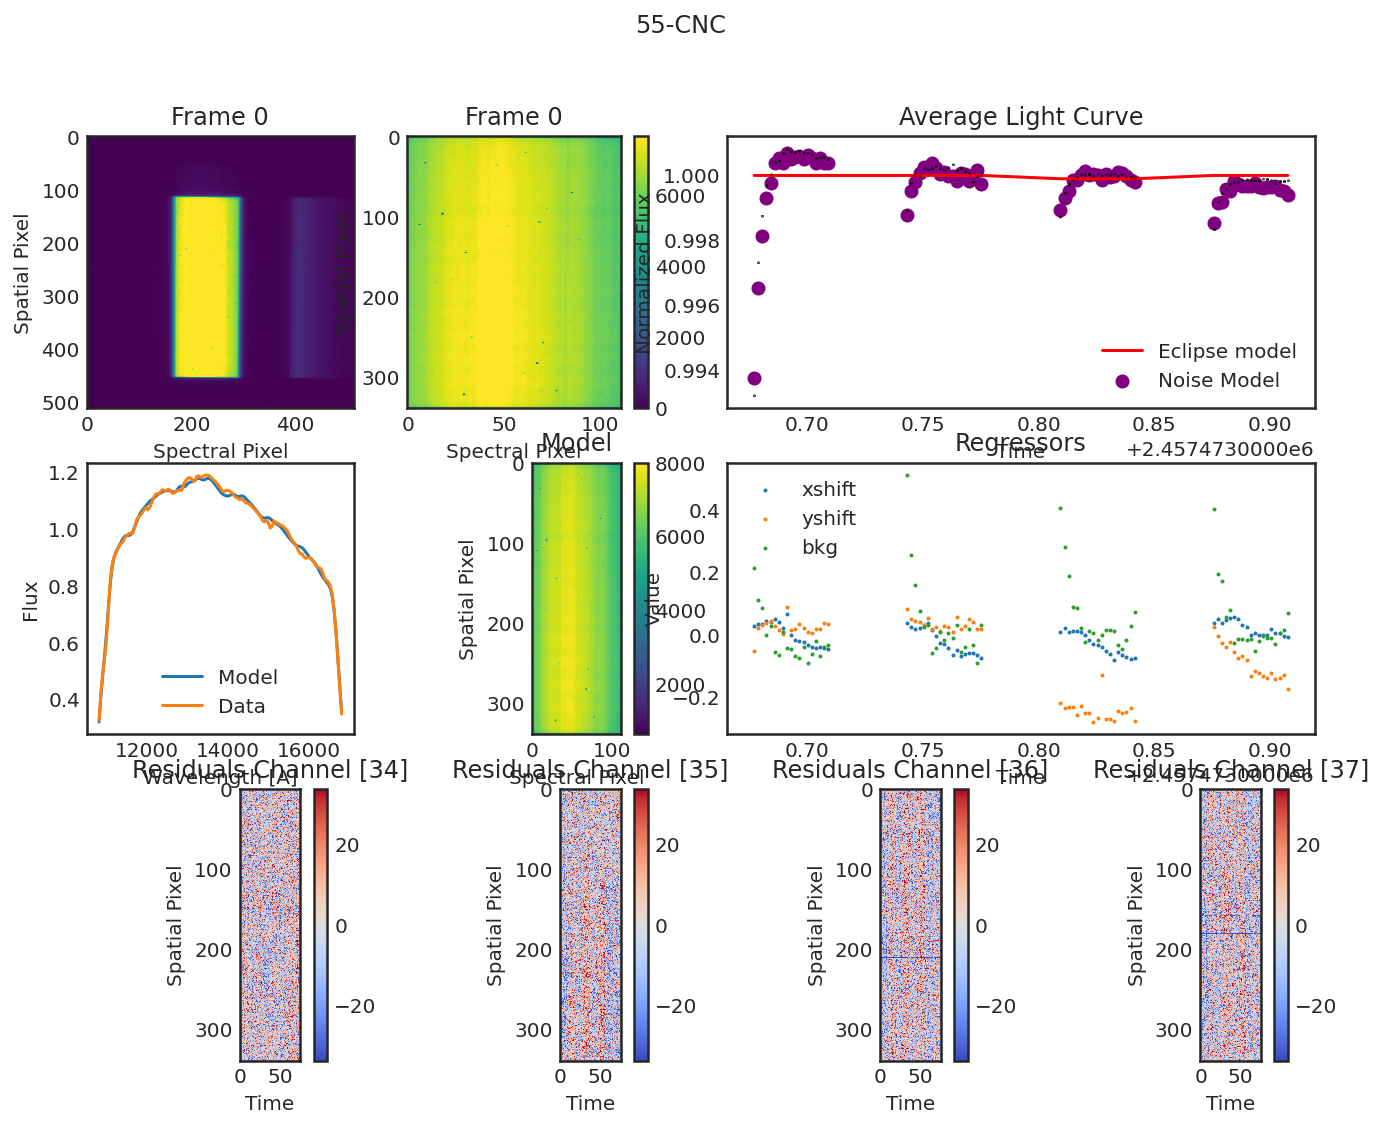

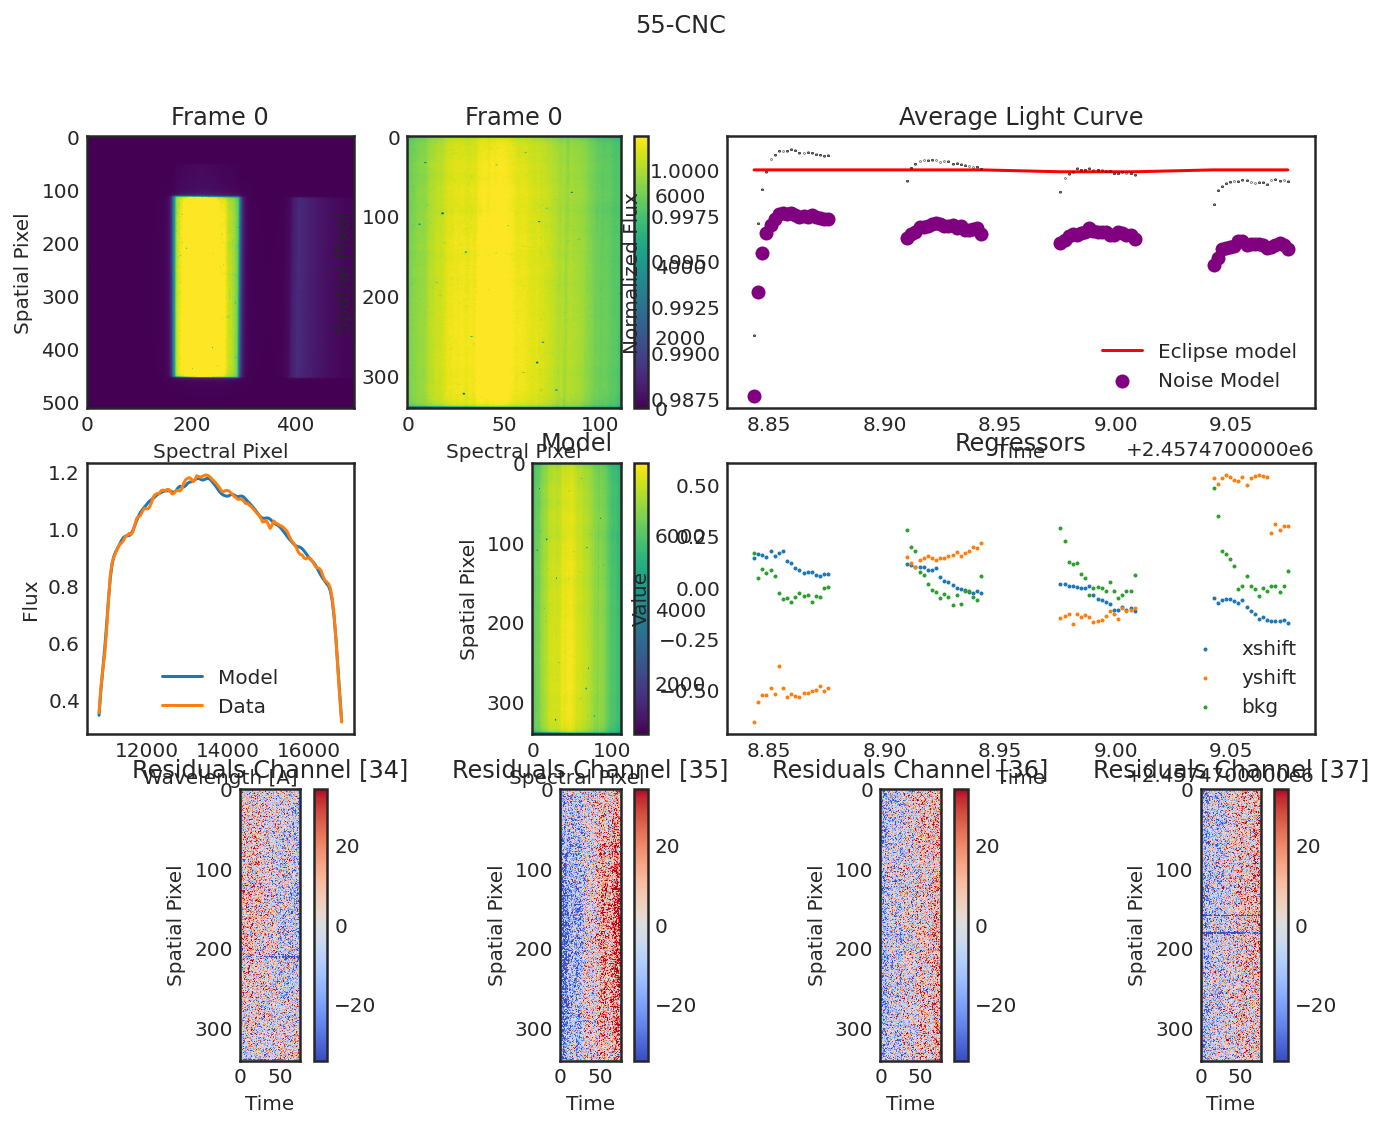

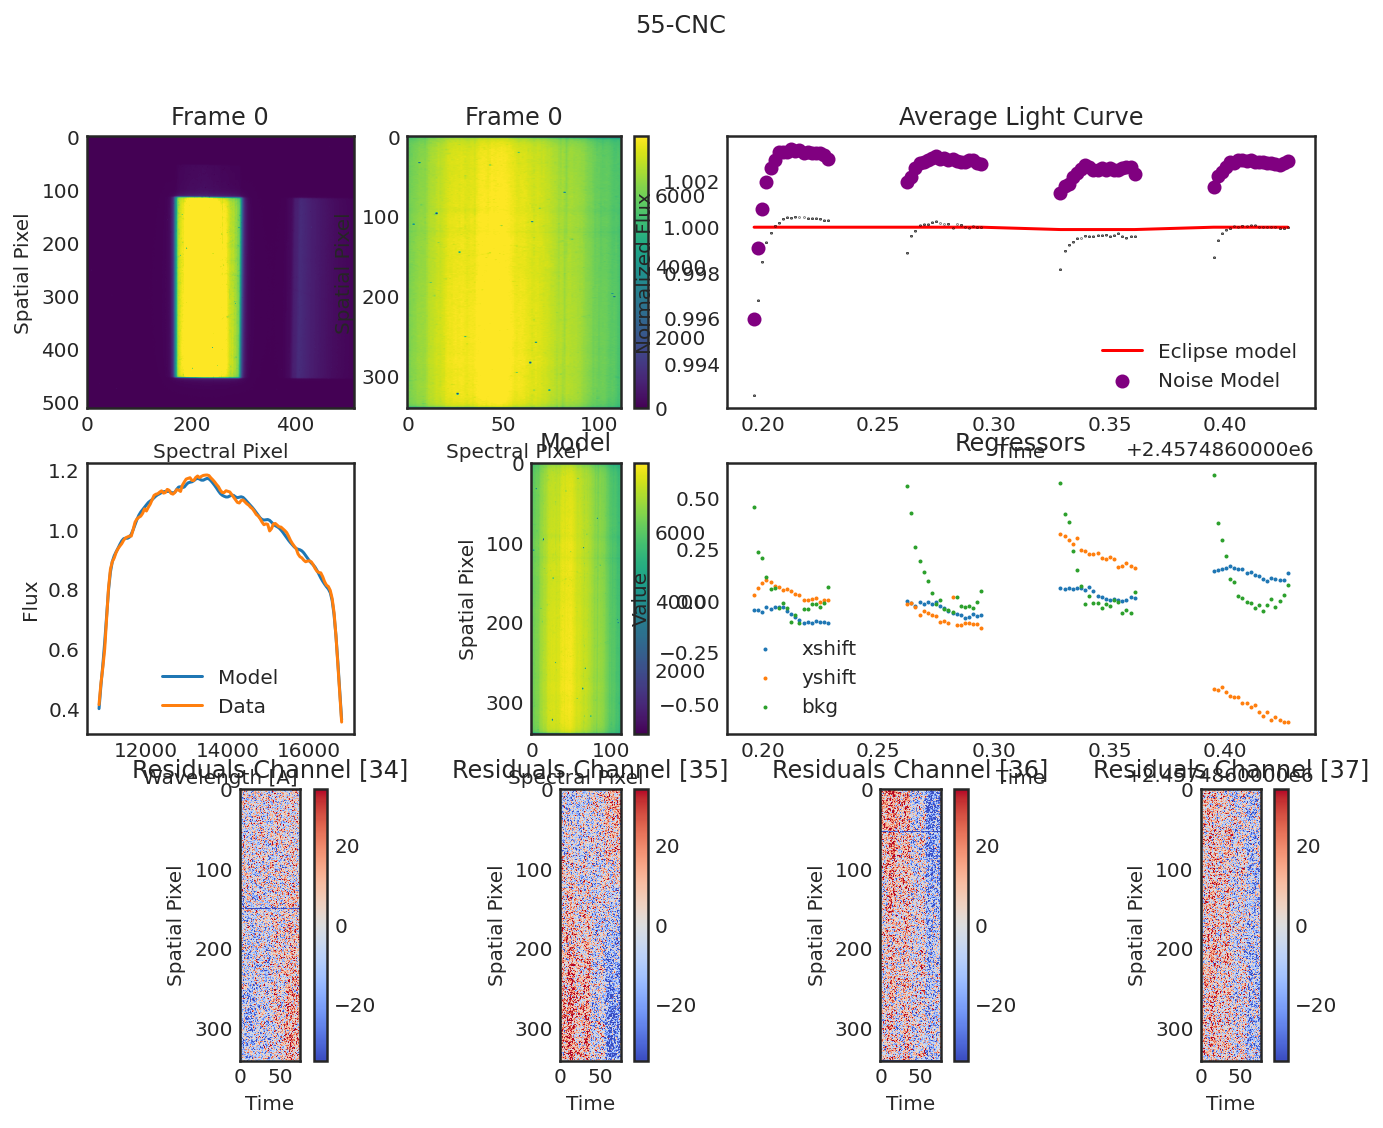

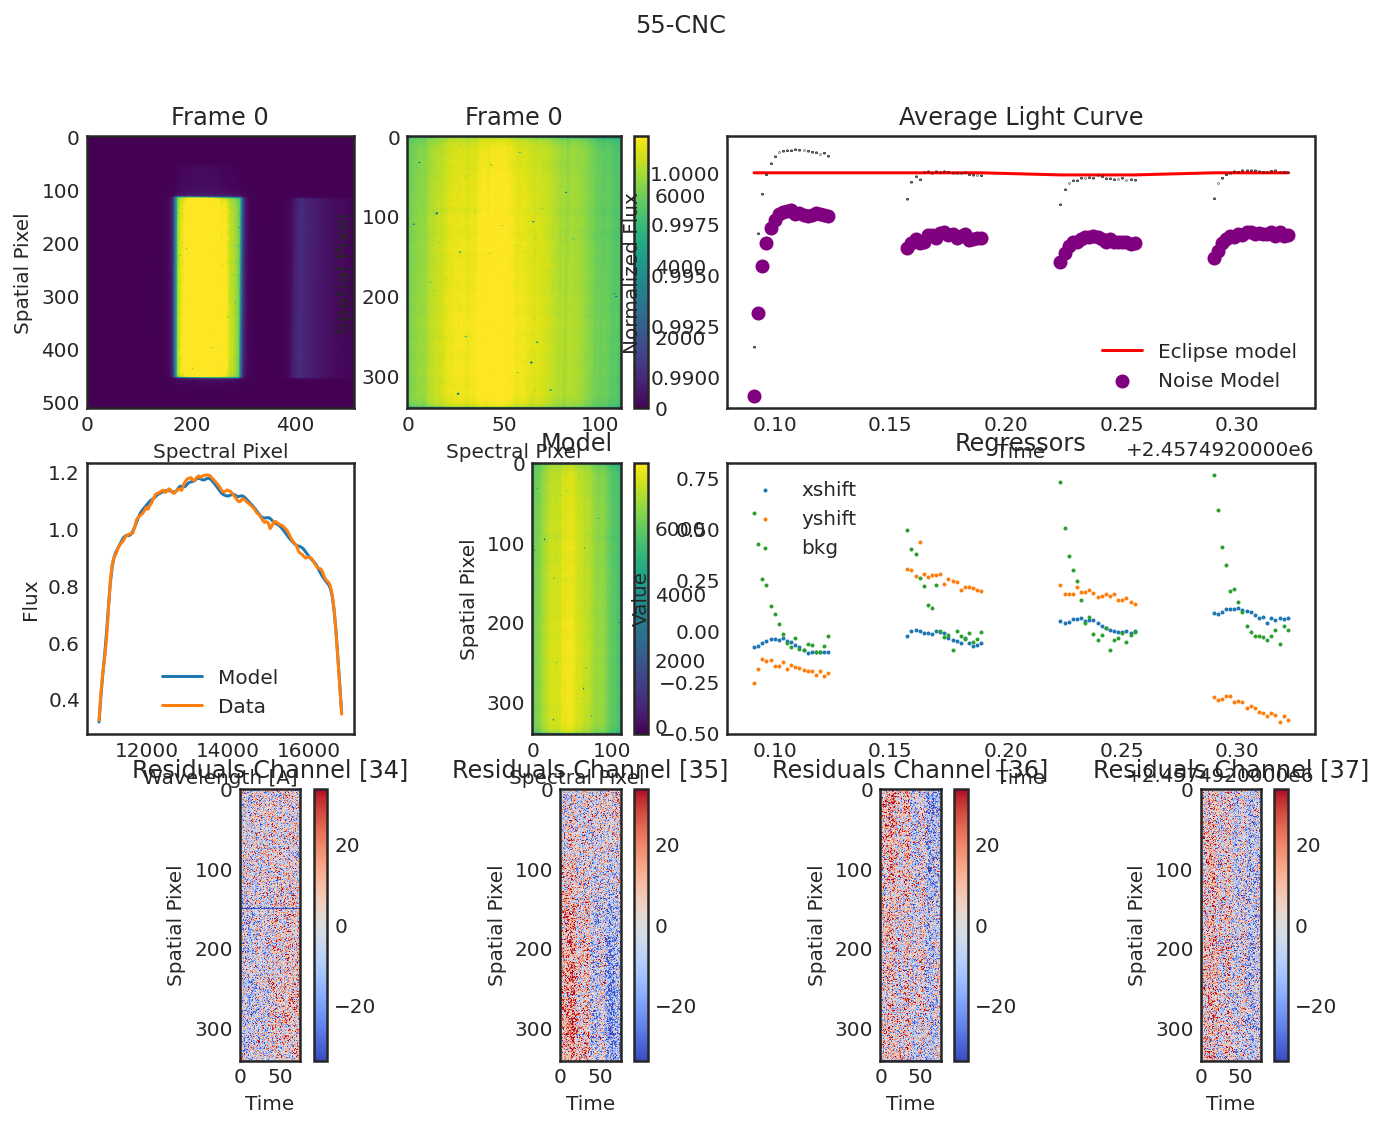

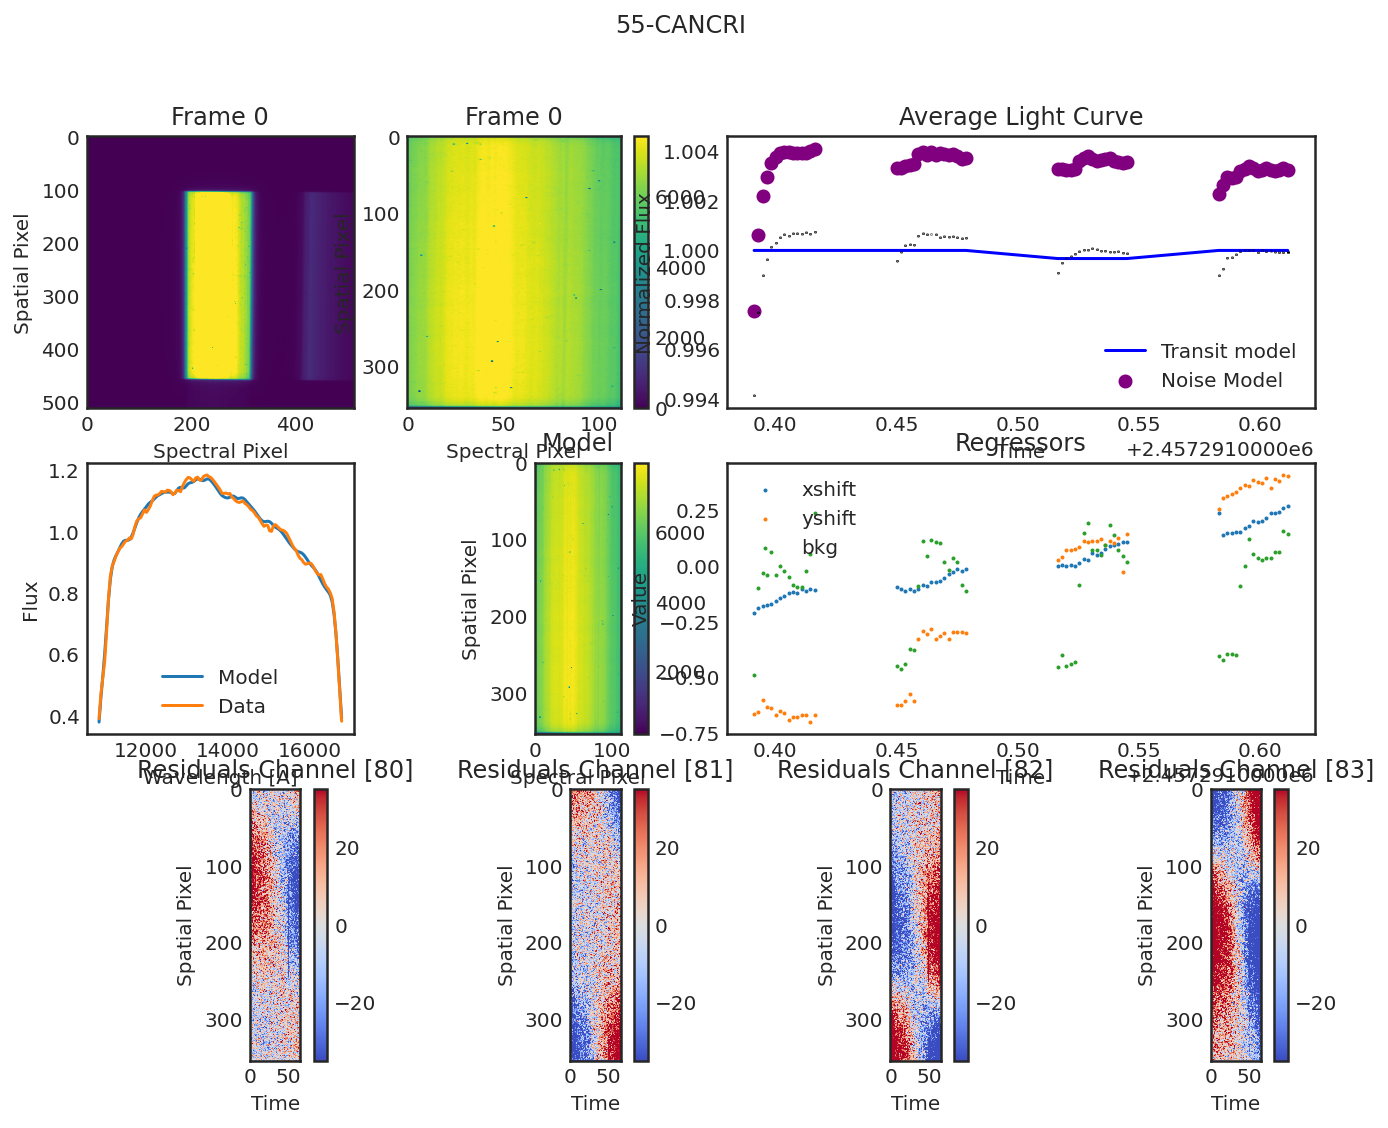

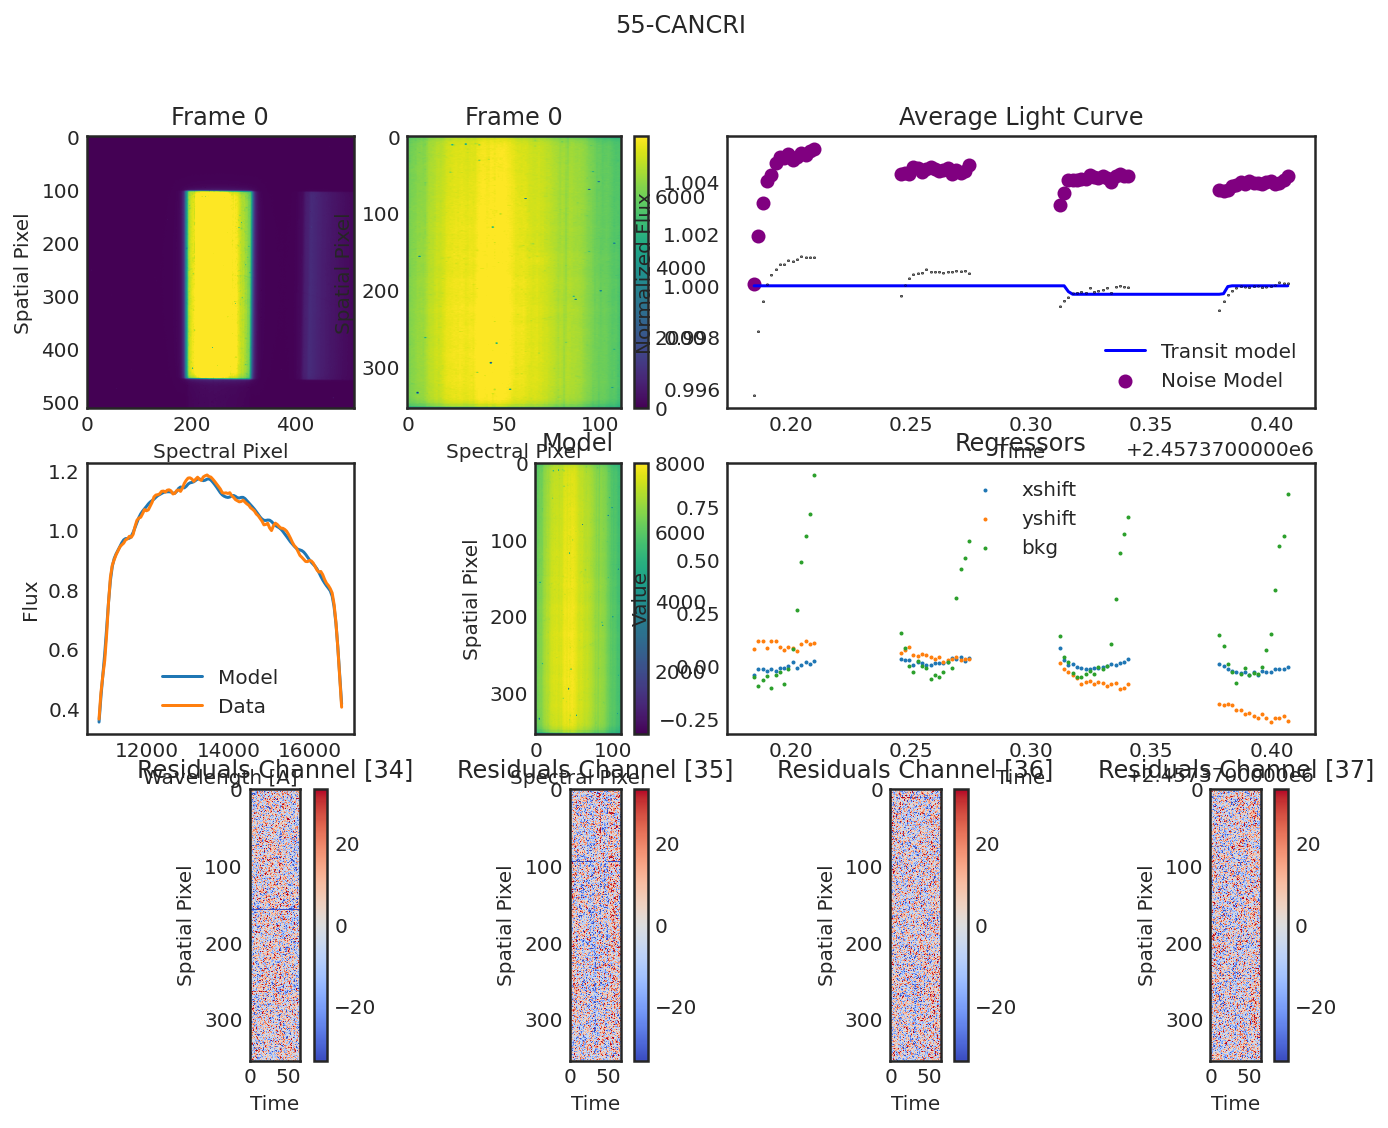

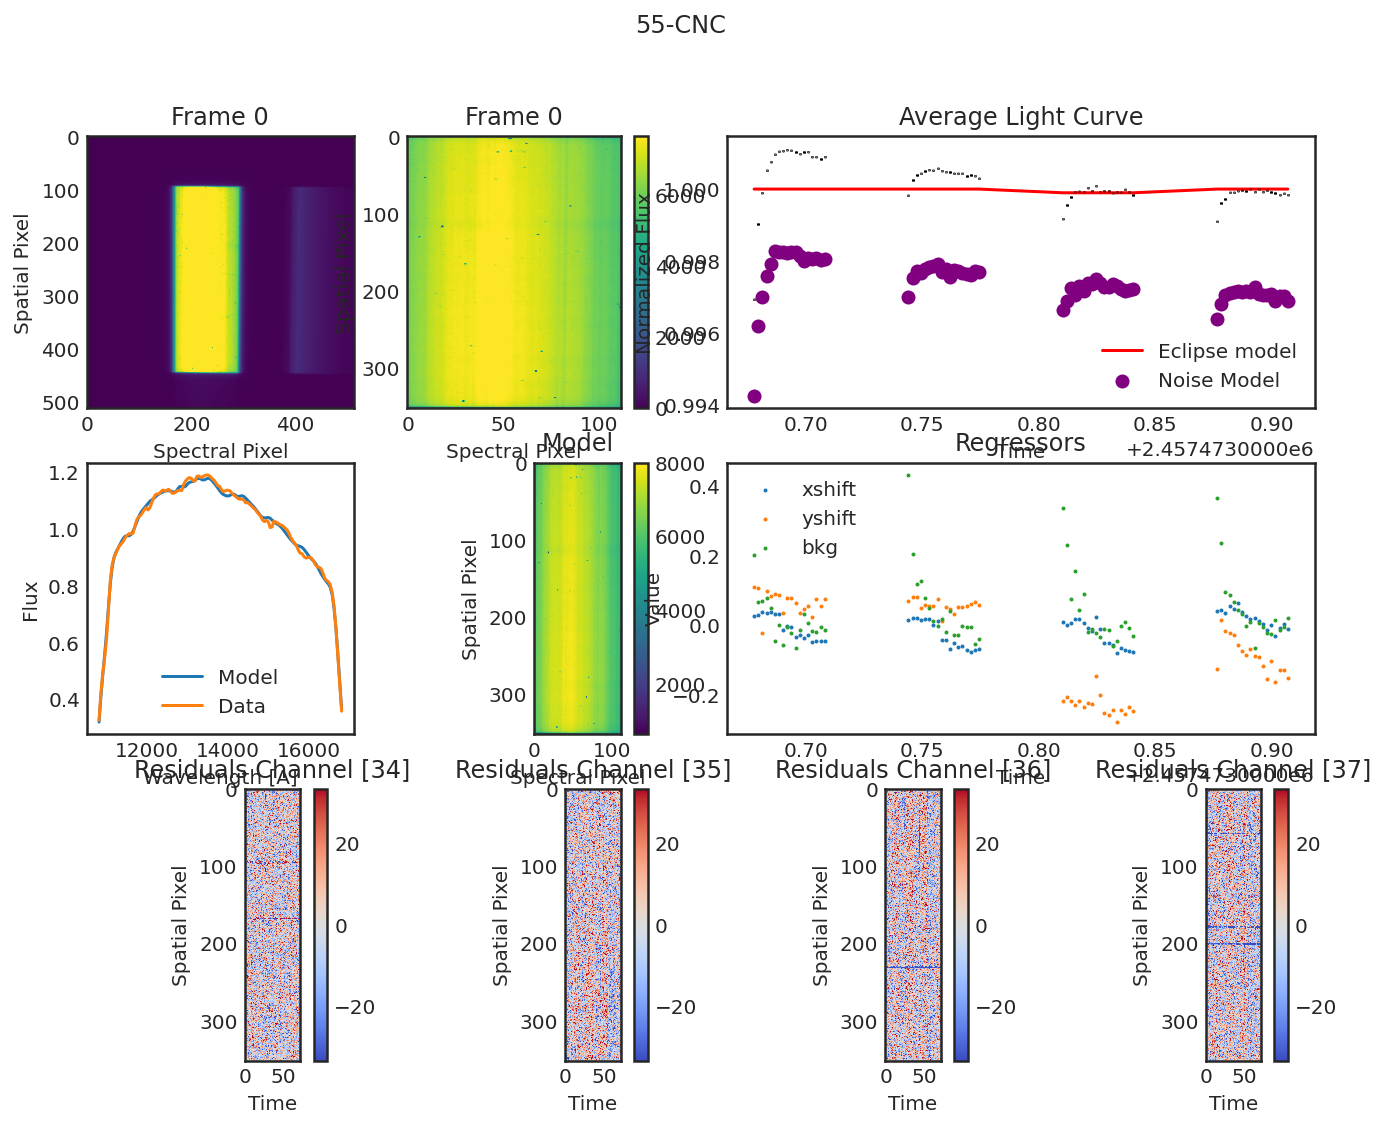

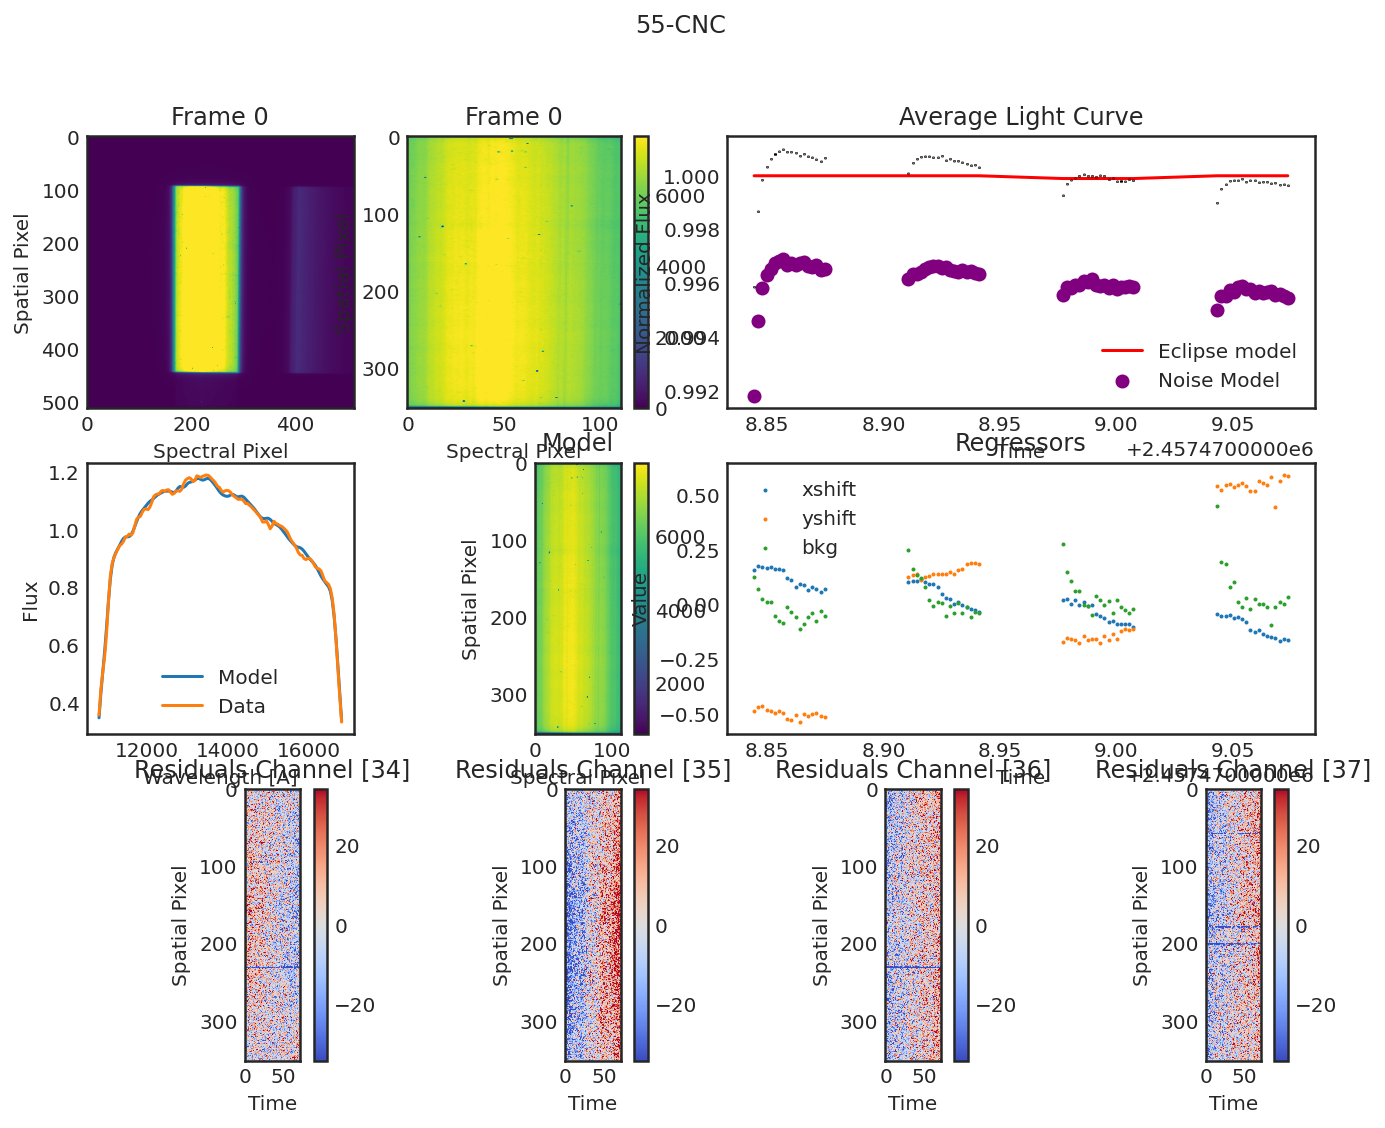

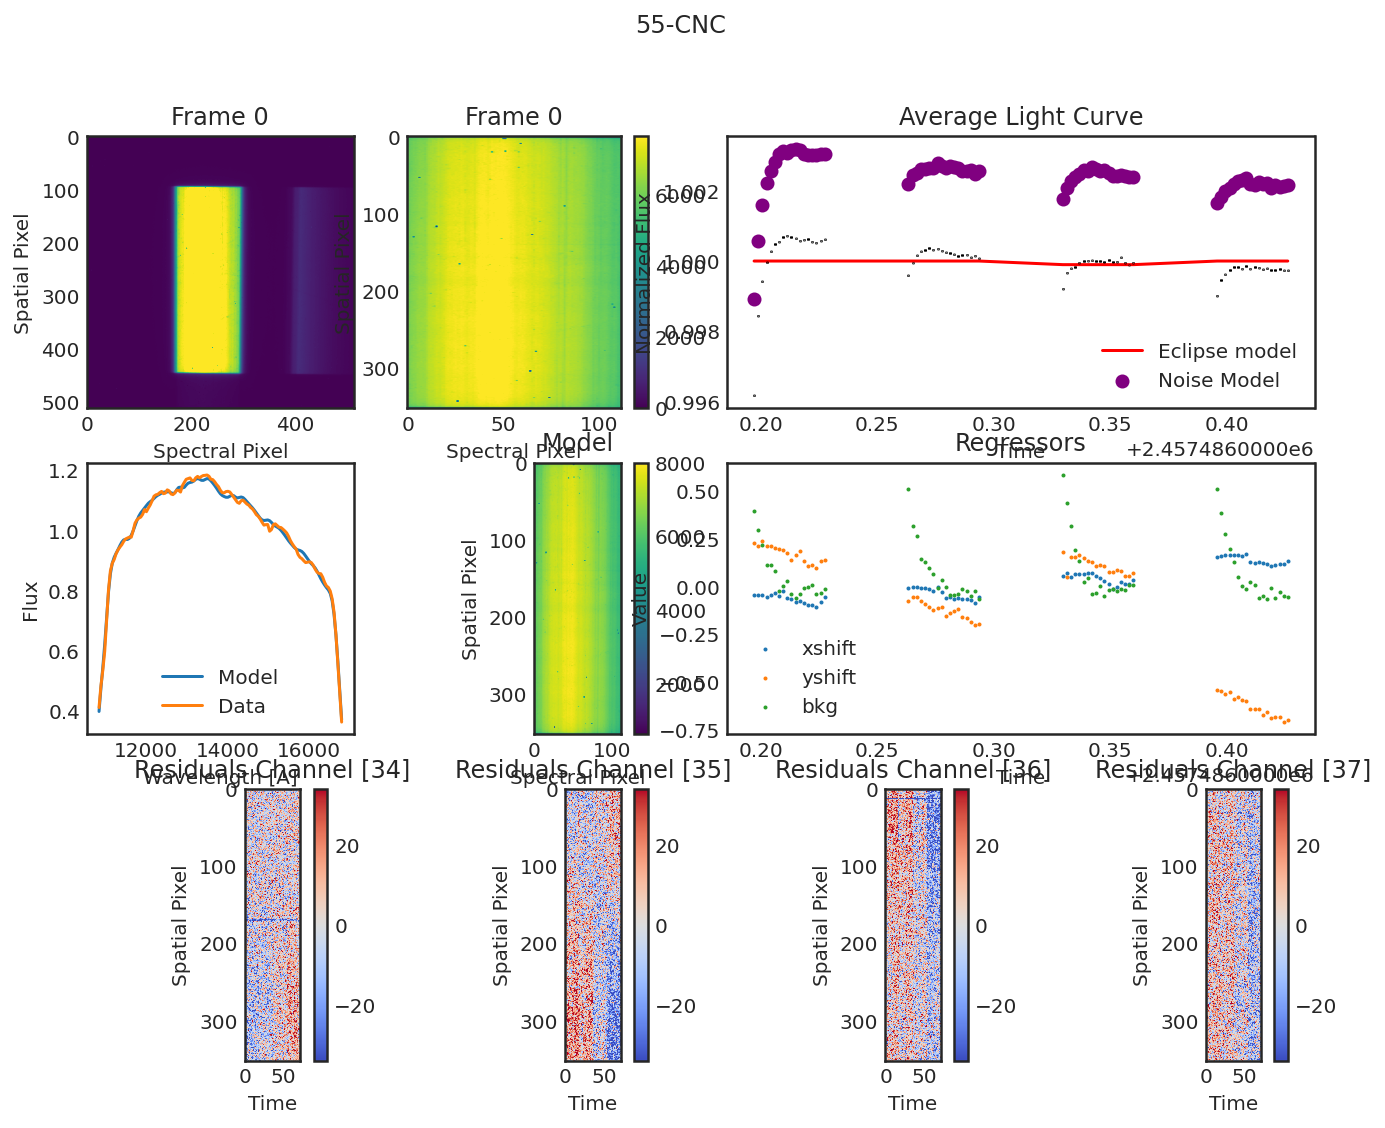

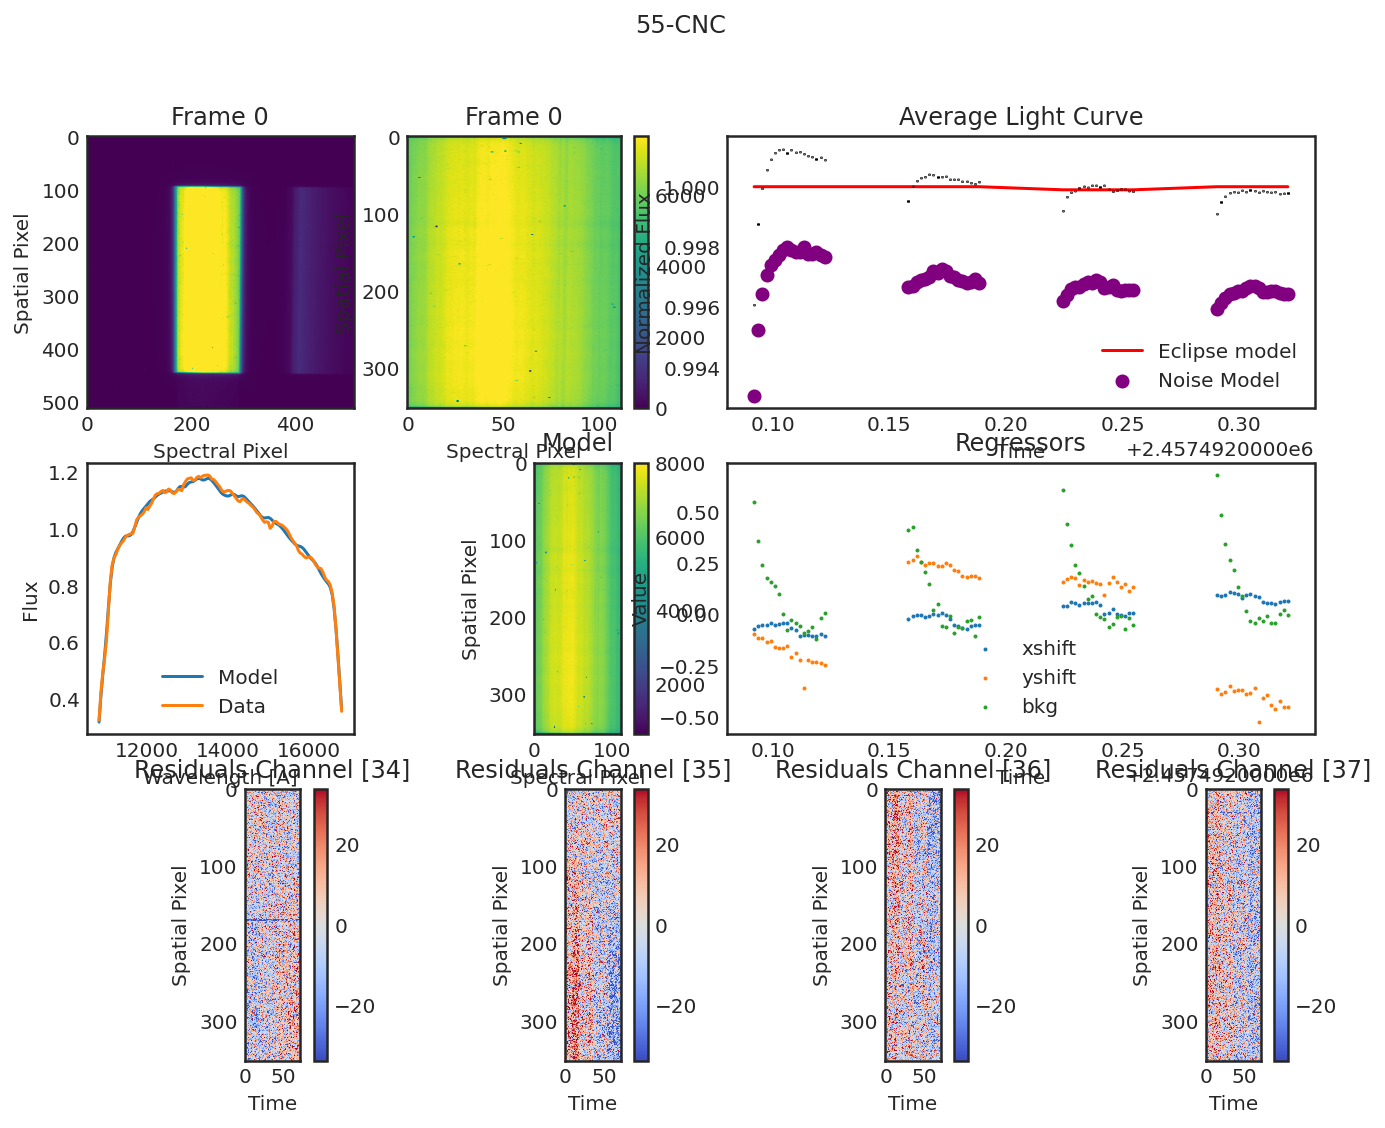

In [17]:
for visit in obs:
    visit.diagnose();
    plt.show();